# Centralizing the Data Vizualizations from the Paper

In [114]:
# dependencies
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

import emission.core.get_database as edb
from plots import *
import scaffolding

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

In [115]:
# loading the data
data = pd.read_csv("filtered_merged_trips.csv")

/tmp/ipykernel_21/3633409825.py:2: DtypeWarning: Columns (66,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("filtered_merged_trips.csv")


In [116]:
# Summary statistics table #MOVE TO ANALYSIS NOTEBOOK
mode_of_interest = 'E-bike'
data_eb = data.query(f"mode_confirm == '{mode_of_interest}'")
print(len(pd.unique(data.user_id)))
stat_data = data[['distance_miles','duration']]
stat_data.describe()

122


,distance_miles,duration
count,61496.000000,61496.000000
mean,3.933690,24.145146
std,5.991457,30.691071
min,0.062013,0.000068
25%,0.721590,9.173613
50%,1.983511,15.289998
75%,4.342240,28.071609
max,49.929320,479.495935


## Modes in Mini vs Full Pilot

In [117]:
# processing mini data
mini_data = pd.read_csv("trip_program.csv")
mini_data = mini_data[mini_data.program == 'prepilot']
MINI_DATA = mini_data.copy() #saving a copy for later

# Combine variable categories
mini_data = mini_data.replace('Gas Car, drove alone', 'Car')
mini_data = mini_data.replace('Gas Car, with others', 'Shared Car')
mini_data = mini_data.replace('Bikeshare', 'Shared Micromobility')
mini_data = mini_data.replace('Scooter share', 'Shared Micromobility')
mini_data = mini_data.replace('Regular Bike', 'Personal Micromobility')
mini_data = mini_data.replace('Skate board', 'Personal Micromobility')
mini_data = mini_data.replace('Train', 'Transit')
mini_data = mini_data.replace('Free Shuttle', 'Transit')
mini_data = mini_data.replace('Bus', 'Transit')
mini_data = mini_data.replace('Walk', 'Walk')
mini_data = mini_data.replace('Taxi/Uber/Lyft', 'Ridehail')
mini_data = mini_data.replace('Pilot ebike', 'E-Bike')

#filter out 'not a trip' trips
mini_data = mini_data[~mini_data['Mode_confirm'].isin(['Not a Trip'])]
mini_data = mini_data[~mini_data['Replaced_mode'].isin(['Not a Trip'])]
mini_data = mini_data[~mini_data['Trip_purpose'].isin(['not_a_trip'])]

In [118]:
mini_data.loc[mini_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
mini_data.loc[mini_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = mini_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['trip_type'] = 'All Trips'

t2 = mini_data[mini_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['trip_type'] = 'Work Trips'
t2.loc[1.5] = 'Other', 0, 0, 'Work Trips'
t2 = t2.sort_index().reset_index(drop=True)

mini_data = pd.concat([t1,t2])
mini_data['Dataset'] = 'Minipilot'
mini_data.columns = ['Mode','Count','Proportion','Trip Type', "Dataset"]

# processing long data
plot_data = data.copy()
plot_data.loc[plot_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
plot_data.loc[plot_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

t1 = plot_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['trip_type'] = 'All Trips'

t2 = plot_data[plot_data['Trip_purpose']=='Work'].copy()
t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['trip_type'] = 'Work Trips'

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long Term'
plot_data.columns = ['Mode','Count','Proportion','Trip Type', "Dataset"]

plot_data = pd.concat([plot_data, mini_data])
plot_data

,Mode,Count,Proportion,Trip Type,Dataset
0,Car,15763,0.256326,All Trips,Long Term
1,E-bike,17348,0.282100,All Trips,Long Term
2,Other,2127,0.034588,All Trips,Long Term
3,Ridehail,324,0.005269,All Trips,Long Term
4,Shared Car,14680,0.238715,All Trips,Long Term
5,Transit,1396,0.022701,All Trips,Long Term
6,Walk,9858,0.160303,All Trips,Long Term
0,Car,3758,0.282939,Work Trips,Long Term
1,E-bike,5959,0.448652,Work Trips,Long Term
2,Other,339,0.025523,Work Trips,Long Term


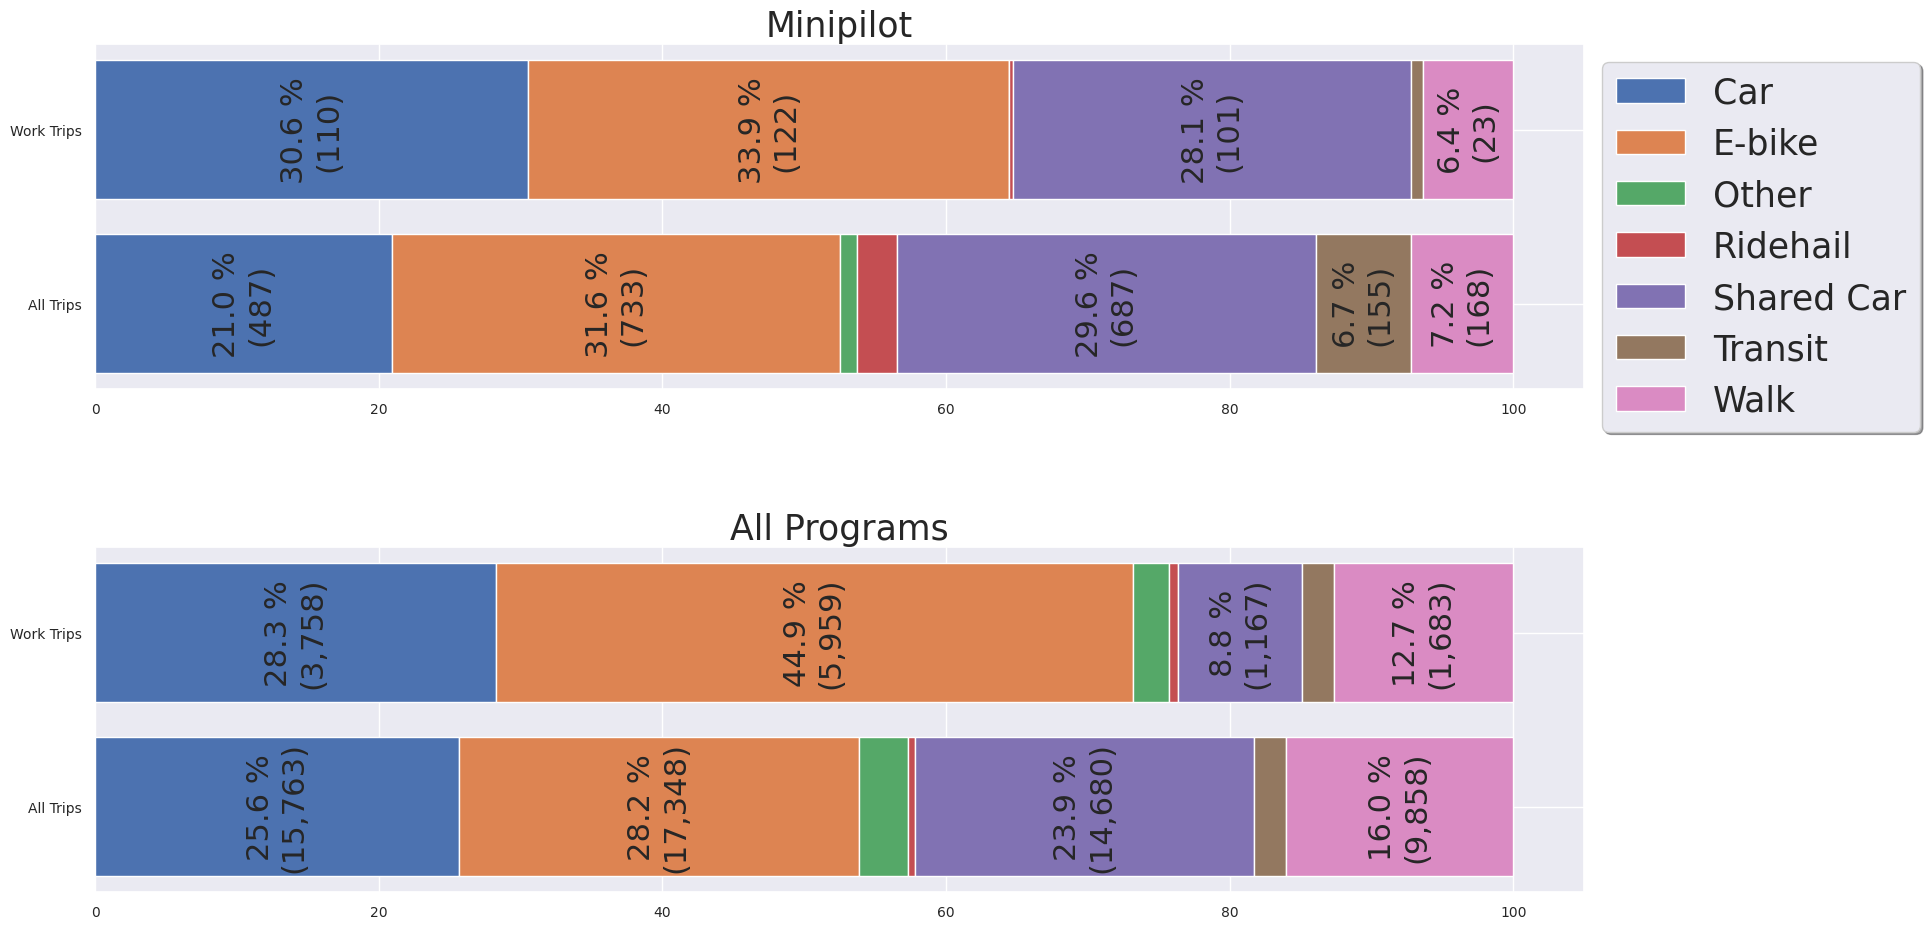

In [119]:
# make and save the chart

width = 0.8
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.rcParams.update({'font.size': 30}) 
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Minipilot']
fig_data_long = plot_data[plot_data['Dataset']=='Long Term']

for mode in pd.unique(fig_data_mini.Mode):
    mini = fig_data_mini[fig_data_mini['Mode']==mode]
    long = fig_data_long[fig_data_long['Mode']==mode]
    
    labels = mini['Trip Type']
    vals = mini['Proportion']*100
    bar_labels = mini['Count']
    vals_str = [f'{y:.1f} %\n({x:,})' if y>5 else '' for x, y in zip(bar_labels, vals)]
    bar = ax[0].barh(labels, vals, width, left=running_total_mini, label=mode)
    ax[0].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=22)
    running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    bar_labels = long['Count']
    vals_str = [f'{y:.1f} %\n({x:,})' if y>5 else '' for x, y in zip(bar_labels, vals)]
    bar = ax[1].barh(labels, vals, width, left=running_total_long, label=mode)
    ax[1].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=22)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

ax[0].set_title('Minipilot', fontsize=25)
ax[1].set_title('All Programs', fontsize=25)
ax[0].legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=25)
plt.subplots_adjust(bottom=0.20)
fig.tight_layout()
plt.show()

## Mode Share by Program

In [120]:
# process the data for the clustered chart
data.program.unique()

array(['4c', 'cc', 'fc', 'pc', 'sc', 'vail'], dtype=object)

In [121]:
mode_data = data.copy()

#clean up the modes
mode_data.loc[mode_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
mode_data.loc[mode_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'

program_list = ['4c', 'cc', 'fc', 'pc', 'sc', 'vail']
work_plot_data = []
all_plot_data = []
for program in program_list:
    program_data = mode_data[mode_data.program == program]

    t1 = program_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
    t1[program] = (t1['distance_miles'] / np.sum(t1.distance_miles)) * 100
    t1 = t1.set_index('Mode_confirm')
    t1 = t1.drop(columns = ['distance_miles'])
    all_plot_data.append(t1)

    t2 = program_data[program_data['Trip_purpose']=='Work'].copy()
    t2 = t2.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
    t2[program] = (t2['distance_miles'] / np.sum(t2.distance_miles)) * 100
    t2 = t2.set_index('Mode_confirm')
    t2 = t2.drop(columns = ['distance_miles'])
    work_plot_data.append(t2)
    
work_trips = pd.concat(work_plot_data, axis = 1)
all_trips = pd.concat(all_plot_data, axis = 1)

all_trips = all_trips.transpose()
work_trips = work_trips.transpose()

all_trips['program'] = all_trips.index
all_trips = all_trips.replace({'4c': 'Four Corners\n(Durango)', 
                               'cc': 'Comunity Cycles\n(Boulder)',
                               'sc': 'Smart Commute\n(Denver North)',
                               'pc':'Pueblo',
                               'vail':'Vail',
                               'fc':'Fort Collins'})
all_trips = all_trips.set_index('program')

work_trips['program'] = work_trips.index
work_trips = work_trips.replace({'4c': 'Four Corners\n(Durango)', 
                               'cc': 'Comunity Cycles\n(Boulder)',
                               'sc': 'Smart Commute\n(Denver North)',
                               'pc':'Pueblo',
                               'vail':'Vail',
                               'fc':'Fort Collins'})
work_trips = work_trips.set_index('program')

### make and save the clustered chart

In [122]:
#from https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars
import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    return axe

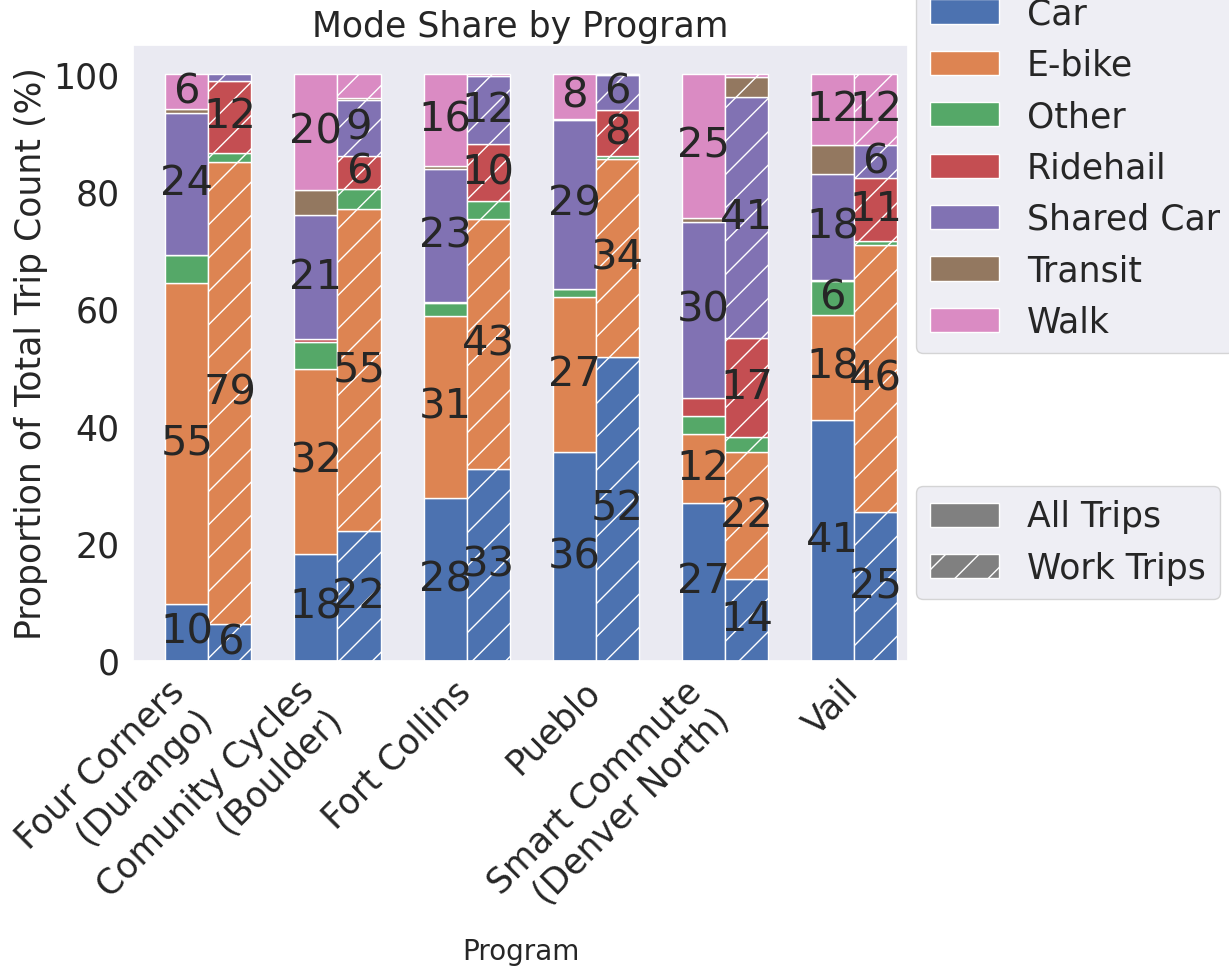

In [123]:
# Then, just call :
ax = plot_clustered_stacked([all_trips, work_trips],["All Trips", "Work Trips"], title = "Mode Share by Program")

for c in ax.containers:
    labels = [f'{round(v.get_height())}' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
    
ax.set_xticklabels(all_trips.index, rotation=45, ha='right')

ax.set_xlabel('Program', fontsize = 20)
ax.set_ylabel('Proportion of Total Trip Count (%)')

plt.savefig("CanBikeCO_report_mode_share_overview.jpeg", bbox_inches='tight')

## Trip Purpose Mini vs Full

In [124]:
#arrange the data
full_purpose_data = data.copy()
mini_purpose_data = MINI_DATA.copy()

#MINI DATA
mini_data = mini_purpose_data.copy()
mini_data = mini_data[~mini_data['Trip_purpose'].isin(['No travel'])]
mini_data.loc[mini_data['Trip_purpose']=='Religious', 'Trip_purpose'] = 'Other'
mini_data.loc[mini_data['Trip_purpose']=='School', 'Trip_purpose'] = 'Other'

t1 = mini_data.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['trip type'] = 'All Trips'

t2 = mini_data[mini_data['Mode_confirm']=='E-bike'].copy()
t2 = t2.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['trip type'] = 'E-Bike Trips'

mini_data = pd.concat([t1,t2])
mini_data['Dataset'] = 'Minipilot'
mini_data.columns = ['Purpose','Count','Proportion','Trip Type', "Dataset"]

#FULL DATA
plot_data = full_purpose_data.copy()
plot_data.loc[plot_data['Trip_purpose']=='Religious', 'Trip_purpose'] = 'Other'
plot_data.loc[plot_data['Trip_purpose']=='School', 'Trip_purpose'] = 'Other'
t1 = plot_data.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t1['proportion'] = t1['distance_miles'] / np.sum(t1.distance_miles)
t1['trip type'] = 'All Trips'
t1.loc[len(t1.index)] = ['Pick-up/Drop off', 0, 0, 'All Trips']

t2 = plot_data[plot_data['Mode_confirm']=='E-bike'].copy()
t2 = t2.groupby(['Trip_purpose'], as_index=False).count()[['Trip_purpose','distance_miles']]
t2['proportion'] = t2['distance_miles'] / np.sum(t2.distance_miles)
t2['trip type'] = 'E-Bike Trips'
t2.loc[len(t2.index)] = ['Pick-up/Drop off', 0, 0, 'E-Bike Trips']

plot_data = pd.concat([t1,t2])
plot_data['Dataset'] = 'Long Term'
plot_data.columns = ['Purpose','Count','Proportion','Trip Type', "Dataset"]

plot_data = pd.concat([plot_data, mini_data])
# plot_data

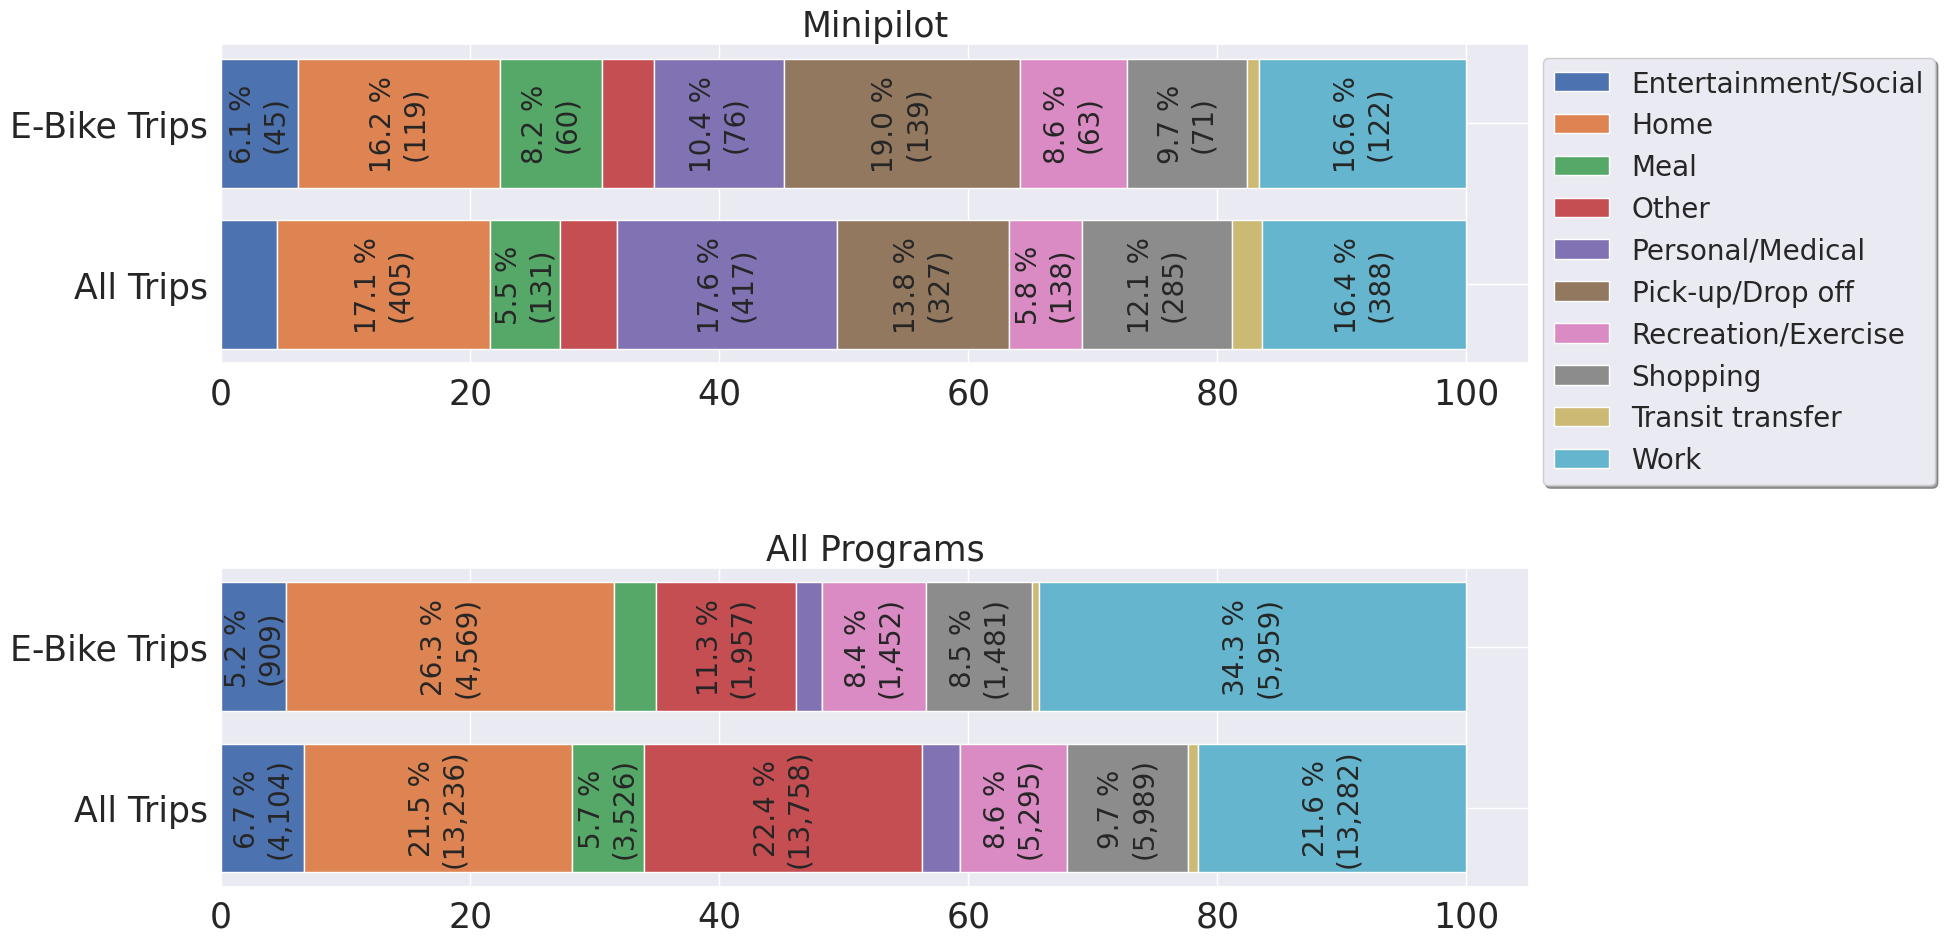

In [125]:
# create the chart

width = 0.8
fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.rcParams.update({'font.size': 25}) 
running_total_mini = [0,0]
running_total_long = [0,0]
fig_data_mini = plot_data[plot_data['Dataset']=='Minipilot']
fig_data_long = plot_data[plot_data['Dataset']=='Long Term']

for purp in pd.unique(fig_data_mini.Purpose):
    mini = fig_data_mini[fig_data_mini['Purpose']==purp]
    long = fig_data_long[fig_data_long['Purpose']==purp]
    
    labels = mini['Trip Type']
    vals = mini['Proportion']*100
    bar_labels = mini['Count']
    vals_str = [f'{y:.1f} %\n({x:,})' if y>5 else '' for x, y in zip(bar_labels, vals)]
    bar = ax[0].barh(labels, vals, width, left=running_total_mini, label=purp)
    ax[0].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=20)
    running_total_mini[0] = running_total_mini[0]+vals.iloc[0]
    running_total_mini[1] = running_total_mini[1]+vals.iloc[1]

    labels = long['Trip Type']
    vals = long['Proportion']*100
    bar_labels = long['Count']
    vals_str = [f'{y:.1f} %\n({x:,})' if y>5 else '' for x, y in zip(bar_labels, vals)]
    bar = ax[1].barh(labels, vals, width, left=running_total_long, label=purp)
    ax[1].bar_label(bar, label_type='center', labels=vals_str, rotation=90, fontsize=20)
    running_total_long[0] = running_total_long[0]+vals.iloc[0]
    running_total_long[1] = running_total_long[1]+vals.iloc[1]

ax[0].set_title('Minipilot', fontsize=25)
ax[1].set_title('All Programs', fontsize=25)
ax[0].legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=20)
plt.subplots_adjust(bottom=0.20)
fig.tight_layout()
plt.savefig("CanBikeCO_report_purp_share.jpeg")
plt.show()

## Show what purposes diffrent programs used the e-bikes for

In [126]:
full_purpose_data = data.copy()
e_purpose = full_purpose_data[full_purpose_data.Mode_confirm == 'E-bike']

e_purpose.loc[e_purpose['Trip_purpose']=='Religious', 'Trip_purpose'] = 'Other'
e_purpose.loc[e_purpose['Trip_purpose']=='School', 'Trip_purpose'] = 'Other'

program_list = ['4c', 'cc', 'fc', 'pc', 'sc', 'vail']
all_plot_data = []
for program in program_list:
    program_data = e_purpose[mode_data.program == program]

    t1 = program_data.groupby(['Trip_purpose'], as_index=False).sum()[['Trip_purpose','distance_miles']]
    t1['distance_miles'].fillna(0, inplace=True)
    t1[program] = (t1['distance_miles'] / np.sum(t1.distance_miles)) * 100
    t1 = t1.set_index('Trip_purpose')
    t1 = t1.drop(columns = ['distance_miles'])
    all_plot_data.append(t1)
    
all_trips = pd.concat(all_plot_data, axis = 1)

all_trips = all_trips.transpose()

all_trips['program'] = all_trips.index
all_trips = all_trips.replace({'4c': 'Four Corners\n(Durango)', 
                               'cc': 'Comunity Cycles\n(Boulder)',
                               'sc': 'Smart Commute\n(Denver North)',
                               'pc':'Pueblo',
                               'vail':'Vail',
                               'fc':'Fort Collins'})
all_trips = all_trips.set_index('program')
# all_trips = all_trips.drop(columns=['Trip_purpose'])

all_trips

/tmp/ipykernel_21/3120951855.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  program_data = e_purpose[mode_data.program == program]
/tmp/ipykernel_21/3120951855.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t1 = program_data.groupby(['Trip_purpose'], as_index=False).sum()[['Trip_purpose','distance_miles']]
/tmp/ipykernel_21/3120951855.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  program_data = e_purpose[mode_data.program == program]
/tmp/ipykernel_21/3120951855.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t1 = program_

Trip_purpose,Entertainment/Social,Home,Meal,Other,Personal/Medical,Recreation/Exercise,Shopping,Transit transfer,Work
program,,,,,,,,,
Four Corners\n(Durango),3.350406,33.631181,4.343044,8.716938,0.237130,5.012298,9.169886,0.170986,35.368130
Comunity Cycles\n(Boulder),3.196050,31.032284,2.898926,9.635477,1.789716,10.150997,5.976961,0.523261,34.796328
Fort Collins,2.182344,27.295081,2.067012,11.727759,2.502932,7.898888,9.947937,0.684368,35.693678
Pueblo,21.465674,12.907053,2.325854,15.152311,4.131477,24.364485,5.881472,0.408723,13.362951
Smart Commute\n(Denver North),2.324331,35.126383,1.852444,2.791532,0.375686,4.565950,2.674597,0.135057,50.154019
Vail,3.251829,32.426163,5.338610,13.396808,0.985428,5.274282,6.361933,0.506718,32.458230


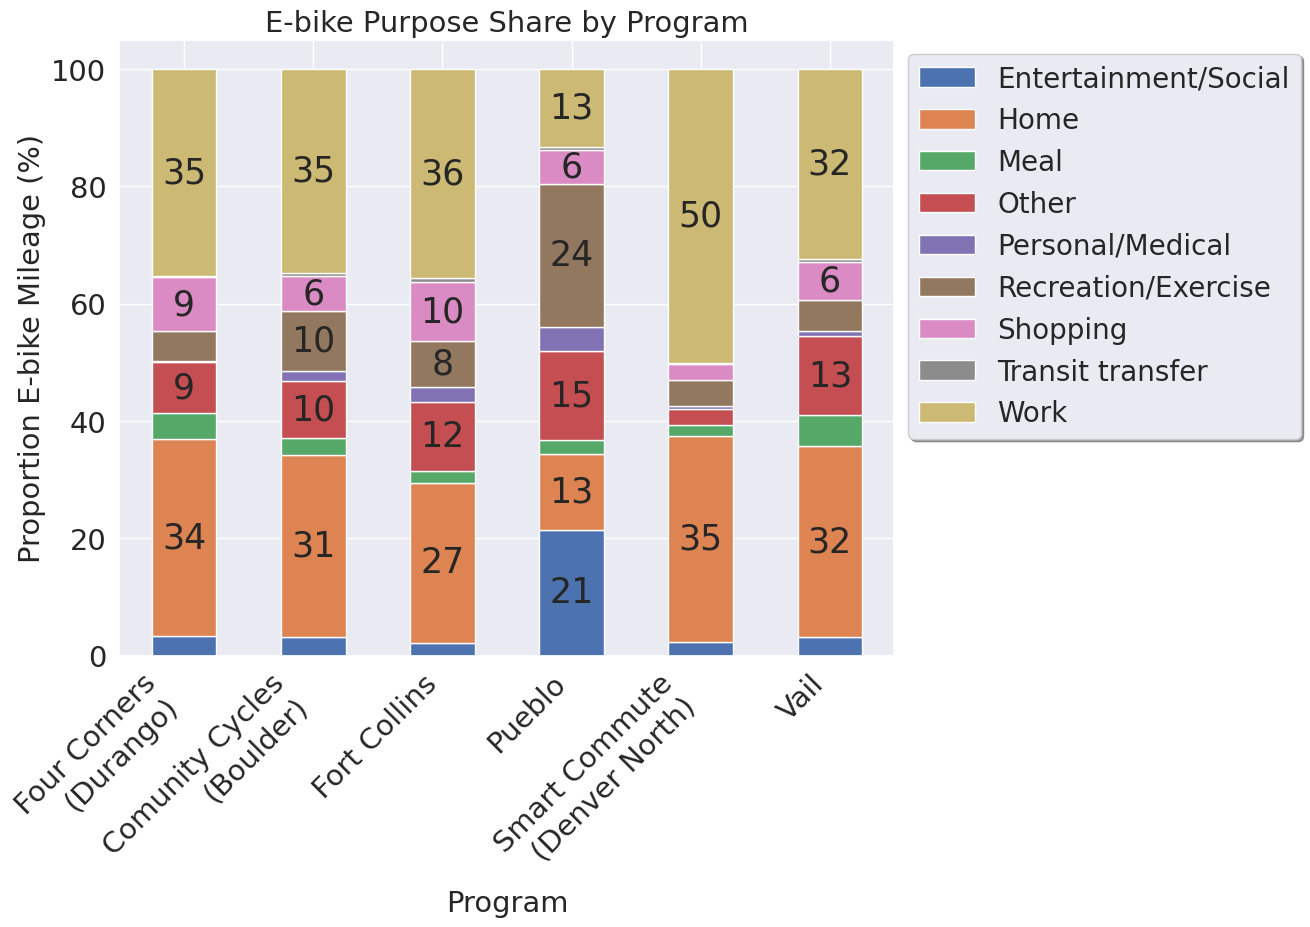

In [127]:
#https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
ax = all_trips.plot.bar(stacked=True, 
                        title="E-bike Purpose Share by Program", 
                        ylabel="Proportion E-bike Mileage (%)",
                        xlabel = "Program",
                        rot = 45)

for c in ax.containers:
    labels = [f'{round(v.get_height())}' if v.get_height() > 5.5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_xticklabels(all_trips.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=20)

plt.savefig("CanBikeCO_report_ebike_programs_purp_share.jpeg", bbox_inches='tight')


In [128]:
## figure 10 replacement
#want a bar chart with age bins on the x and %of mode share on the y

#so need mode share by age
#have done mode share by program

mode_data = data.copy() #complete set of cleaned data
# mode_data.loc[mode_data['Mode_confirm']=='Personal Micromobility', 'Mode_confirm'] = 'Other'
# mode_data.loc[mode_data['Mode_confirm']=='Shared Micromobility', 'Mode_confirm'] = 'Other'


In [129]:
bins = [0, 25, 50, 75]
mode_data['age_bin'] = pd.cut(mode_data['AGE'], bins)


In [130]:
age_modes = mode_data.groupby(['age_bin', 'Mode_confirm'], as_index=False).count()[['age_bin', 'Mode_confirm','distance_miles']]
age_modes['proportion'] = age_modes['distance_miles'] / np.sum(age_modes.distance_miles)

list_age_modes = []
for age_bin in age_modes.age_bin.unique():
    age_data = mode_data[mode_data['age_bin'] == age_bin]

    t1 = age_data.groupby(['Mode_confirm'], as_index=False).count()[['Mode_confirm','distance_miles']]
    t1['distance_miles'].fillna(0, inplace=True)
    t1[age_bin] = (t1['distance_miles'] / np.sum(t1.distance_miles)) * 100
    t1 = t1.set_index('Mode_confirm')
    t1 = t1.drop(columns = ['distance_miles'])
    list_age_modes.append(t1)
        
age_modes = pd.concat(list_age_modes, axis = 1)

age_modes = age_modes.transpose()

age_modes

Mode_confirm,Car,E-bike,Other,Personal Micromobility,Ridehail,Shared Car,Shared Micromobility,Transit,Walk
"(0, 25]",16.176471,22.660428,0.868984,1.069519,0.222816,32.174688,0.646168,0.980392,25.200535
"(25, 50]",23.809312,28.418284,2.235396,1.488778,0.650783,25.837438,0.229557,2.418151,14.912300
"(50, 75]",35.867864,29.491721,0.543702,1.367493,0.181234,13.534888,0.041190,2.199522,16.772387


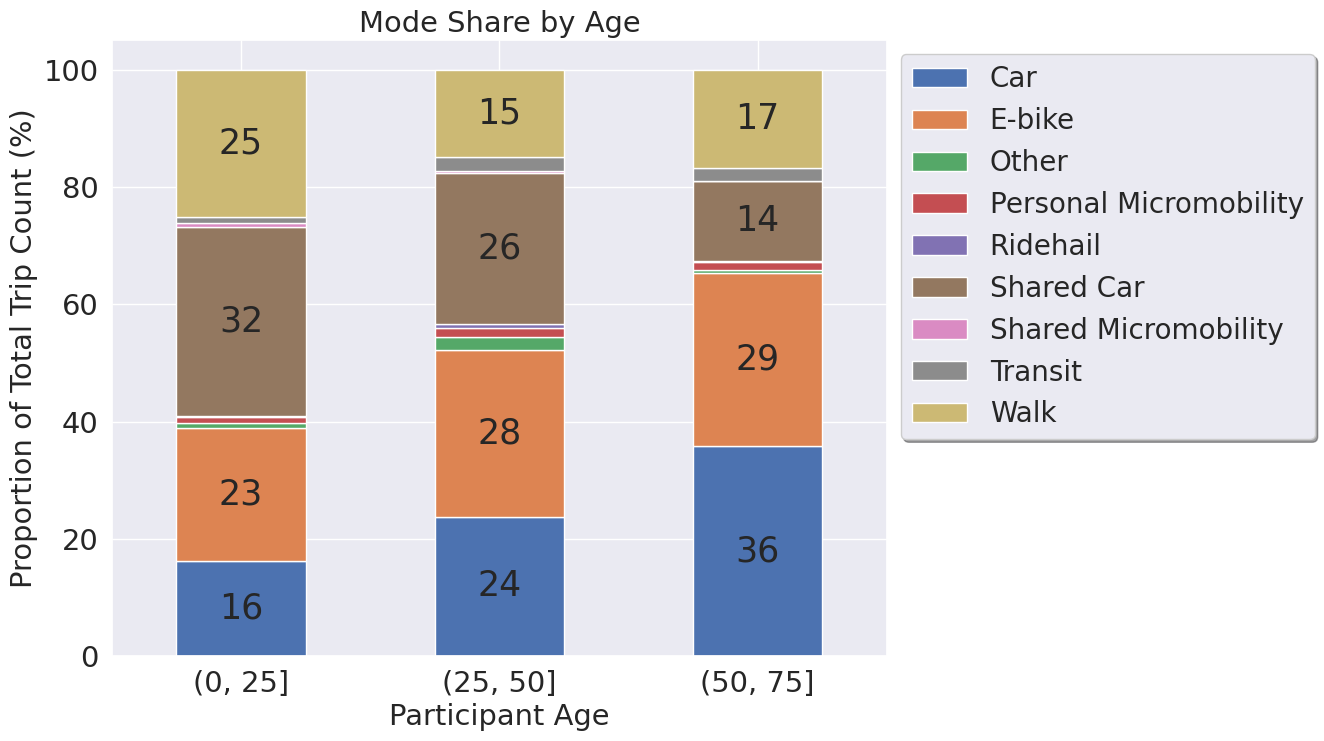

In [131]:
#https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
ax = age_modes.plot.bar(stacked=True, 
                        title="Mode Share by Age", 
                        ylabel="Proportion of Total Trip Count (%)",
                        xlabel = "Participant Age",
                        rot = 0)

for c in ax.containers:
    labels = [f'{round(v.get_height())}' if v.get_height() > 5.5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# ax.set_xticklabels(age_modes.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1,1), fancybox=True, shadow=True, fontsize=20)

plt.savefig("CanBikeCO_report_age_mode_share.jpeg", bbox_inches='tight')

In [103]:
expanded_ct = pd.read_csv('expanded_ct.csv')

len(expanded_ct)

/tmp/ipykernel_22/3005360896.py:1: DtypeWarning: Columns (67,74,77) have mixed types. Specify dtype option on import or set low_memory=False.
  expanded_ct = pd.read_csv('expanded_ct.csv')


81547

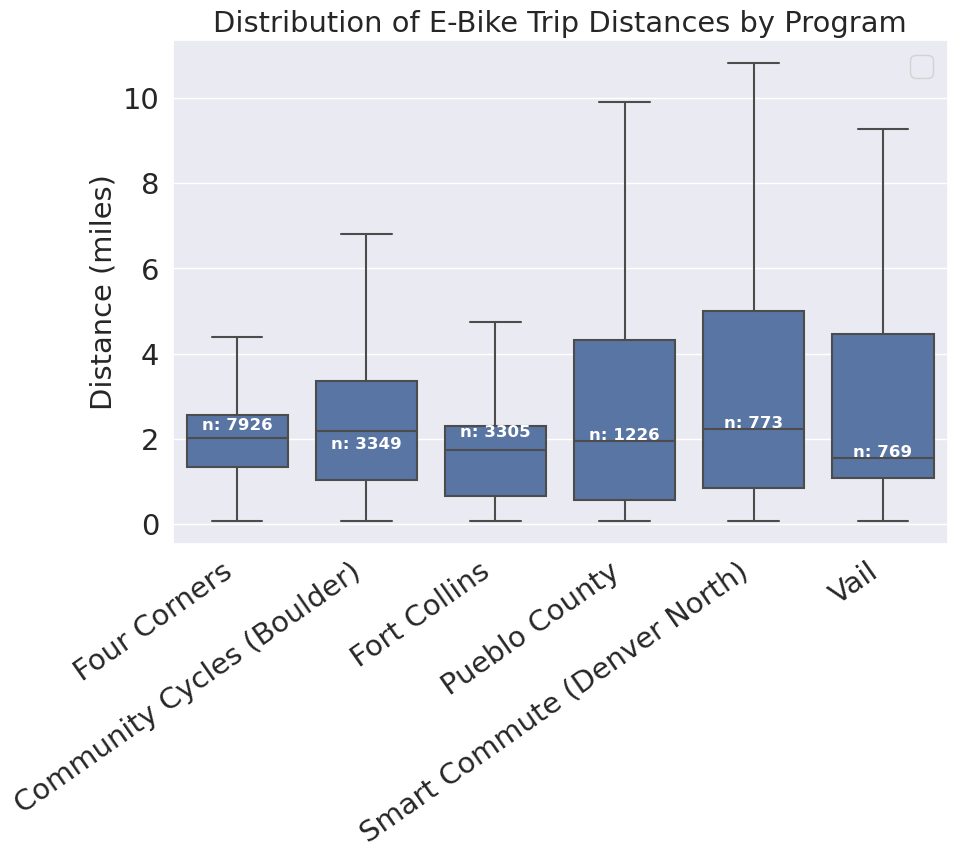

In [137]:
# Distribution of distances by program
plot_data = data.copy()
plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data['Program'] = plot_data['program'].replace(['4c','cc','fc','pc','sc','vail'],['Four Corners','Community Cycles (Boulder)','Fort Collins','Pueblo County','Smart Commute (Denver North)','Vail'])

plot_title = 'Distribution of E-Bike Trip Distances by Program'
ylab = 'Distance (miles)'

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(ax=ax, data=plot_data, x='Program', y='distance_miles', hue='Mode_confirm', showfliers=False).set(title=plot_title, xlabel='', ylabel=ylab)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=35, ha='right')
plt.legend([])

# Calculate number of obs per group & median to position labels
medians = plot_data.groupby(['Program'])['distance_miles'].median().values
nobs = plot_data['Program'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='12',
            color='w',
            weight='semibold')
 
plt.savefig("CanBikeCO_report_e-bike_miles_dist.jpeg", bbox_inches='tight')

## E-bike trips across occuptations

In [138]:
data = data.copy()
data['occupation_cat'] = data['Which best describes your primary job?'].replace(['Sales or service',
                                                                                 'Manufacturing, construction, maintenance, or farming',                                                                            
                                                                                 'Janitorial',
                                                                                 'Professional, managerial, or technical',
                                                                                 'Clerical or administrative support',
                                                                                 'Teacher',
                                                                                 'Medical',
                                                                                 'CNA',
                                                                                 'Restaurant manager',
                                                                                 'Co op laundry',
                                                                                 'Cook',
                                                                                 'Nurse',
                                                                                 'Dining Services',
                                                                                 'Security',
                                                                                 'Food service',
                                                                                 'Csu custodian',
                                                                                 'Residential Dining Services',
                                                                                 'education/early childhood',
                                                                                 'Inbound cs',
                                                                                 'Custodial Maintanace',
                                                                                 'Amazon',
                                                                                 'Custodian',
                                                                                 'Hockey rink',
                                                                                 'Pastry chef and line cook',                                                                                 
                                                                                 'Cooking',
                                                                                 'Education non-profit manager',
                                                                                 'Healthcare',
                                                                                 'Chef',
                                                                                 'Accounting Technician',
                                                                                 'Caregiver/ Qmap',
                                                                                 'Caregiver',
                                                                                 'Health care',
                                                                                 'Medical field'],
                                                                                ['Sales or Service',
                                                                                 'Manufacturing, Construction, Maintenance, or Farming',
                                                                                 'Custodial',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Clerical or Administrative Support',
                                                                                 'Education',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Medical/Healthcare',
                                                                                 'Sales or Service',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Sales or Service',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Education',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Custodial',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Sales or Service',
                                                                                 'Education',
                                                                                 'Medical/Healthcare',
                                                                                 'Sales or Service',
                                                                                 'Professional, Managerial, or Technical',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare',
                                                                                 'Medical/Healthcare'])
data['occupation_cat'].unique()

array(['Sales or Service', 'Food Service', 'Cooking ',
       'Medical/Healthcare', 'Clerical or Administrative Support',
       'Accounting Technician ',
       'Manufacturing, Construction, Maintenance, or Farming',
       'Professional, Managerial, or Technical', 'Education',
       'Education ', 'Csu custodian ', 'Custodial ', 'Custodial', nan,
       'Maintenance ', 'Maintenance', 'Janitorial ', 'Amazon ',
       'Custodial Maintanace ', 'Hockey rink '], dtype=object)

In [139]:
data['occupation_cat']= data['occupation_cat'].replace(['Food Service', 'Cooking ', 'Accounting Technician ','Education ',
                                                       'Csu custodian ','Custodial ','Maintenance ','Maintenance','Janitorial ',
                                                       'Amazon ', 'Custodial Maintanace ', 'Hockey rink '],
                                                      ['Sales or Service' , 'Sales or Service', 'Professional, Managerial, or Technical',
                                                      'Education', 'Custodial', 'Custodial', 'Custodial', 'Custodial', 'Custodial',
                                                      'Sales or Service','Custodial' ,'Sales or Service'])

data['occupation_cat'] = data['occupation_cat'].replace(['Manufacturing, Construction, Maintenance, or Farming', 'Professional, Managerial, or Technical', 'Clerical or Administrative Support'],
                                                        ['Manufacturing, Construction,\nMaintenance, or Farming', 'Professional, Managerial,\nor Technical', 'Clerical or\nAdministrative Support'])
data['occupation_cat'].unique()

array(['Sales or Service', 'Medical/Healthcare',
       'Clerical or\nAdministrative Support',
       'Professional, Managerial,\nor Technical',
       'Manufacturing, Construction,\nMaintenance, or Farming',
       'Education', 'Custodial', nan], dtype=object)

In [140]:
plot_data_1=data[data['occupation_cat'].notnull()]

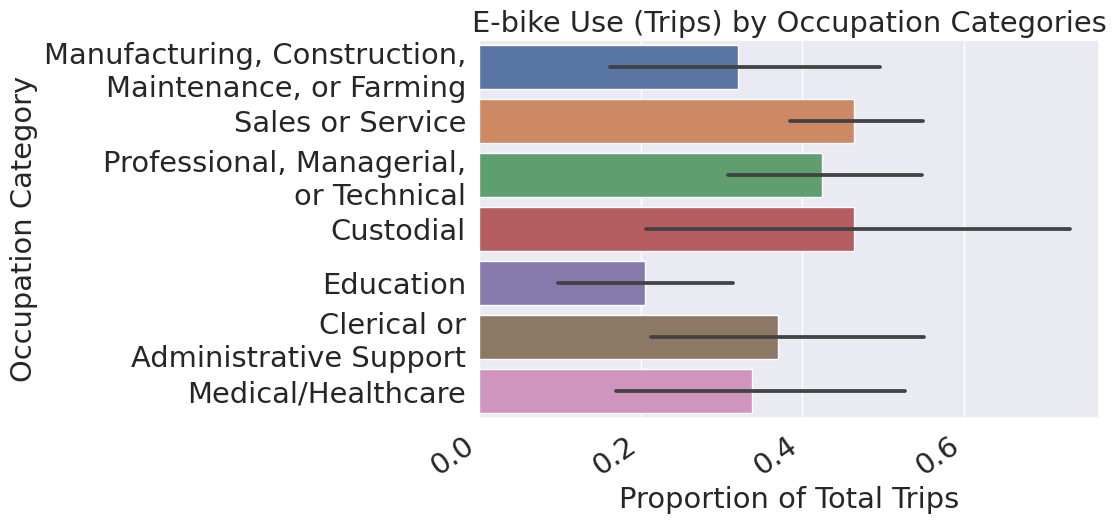

In [141]:
# proportion of trips by occupation
plot_data = plot_data_1.copy()

t1 = plot_data.groupby(['user_id','Mode_confirm'], as_index=False).count()[['user_id','Mode_confirm','distance_miles']]
t1['distance_miles'].fillna(0, inplace=True)
t2 = plot_data.groupby(['user_id'], as_index=False).count()[['user_id','distance_miles']]
plot_data = t1.merge(t2, on='user_id')
plot_data['proportion'] = plot_data['distance_miles_x'] / plot_data['distance_miles_y']
plot_data['proportion'].fillna(0, inplace=True)
t3 = data.copy().groupby(['occupation_cat','user_id'], as_index=False).nth(0)[['occupation_cat','user_id']]

plot_data = plot_data[plot_data['Mode_confirm']=='E-bike']
plot_data = plot_data.merge(t3, on='user_id')

plot_title = 'E-bike Use (Trips) by Occupation Categories'
ylab='Occupation Category'
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data= plot_data, x='proportion' , y='occupation_cat', estimator=np.mean).set(title=plot_title,xlabel='Proportion of Total Trips',ylabel=ylab)
plt.xticks(rotation=35, ha='right')
plt.subplots_adjust(bottom=0.25)

plt.savefig("CanBikeCO_report_occ_ebike_trips.jpeg", bbox_inches='tight')